In [10]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import pygplates
import os
from IPython.display import Image
from pygplates import resolve_topologies as topology2gmt
%matplotlib inline

In [19]:
input_feature_filename = '../Data/Matthews++_410-0Ma/Coastlines/Coastlines_low_res_Matthews++.shp'
input_rotation_filename = ['../Data/Matthews++_410-0Ma/Global_EB_250-0Ma_GK07_Matthews++.rot',
                           '../Data/Matthews++_410-0Ma/Global_EB_410-250Ma_GK07_Matthews++.rot']
#input_rotation_filename = '/Users/wenchaocao/Desktop/New_Rotation.rot'

#Input parameters to define how the reconstruction is made
reconstruction_time = 126
FromAge = 135
ToAge = 117
FigNum = 46
anchor_plate = 0

# Name of ouput file
output_reconstructed_feature_filename = 'coastlines_%0.2fMa.shp' % reconstruction_time

# Use pygplates to carry out the reconstruction 
pygplates.reconstruct(input_feature_filename, input_rotation_filename, output_reconstructed_feature_filename, reconstruction_time, anchor_plate) 

#print output_reconstructed_feature_filename

input_topology_filename = ['../Data/Matthews++_410-0Ma/Mesozoic-Cenozoic_plate_boundaries_Matthews++.gpml', 
                          '../Data/Matthews++_410-0Ma/Paleozoic_plate_boundaries_Matthews++.gpml',
                          '../Data/Matthews++_410-0Ma/TopologyBuildingBlocks_Matthews++.gpml']

In [20]:
output_filename = 'tmp.gmt'

topology2gmt(input_topology_filename,
             input_rotation_filename,
             output_filename,
             reconstruction_time)

../Data/6_2_Reconstructed_Paleogeog_EBIDs_126Ma_Matthews2016GPC/AllFeatures_fig46_135_117_reconstructed_126.00Ma_reconstructed_126.00Ma_reconstructed_126.00Ma.shp
No icesheet found


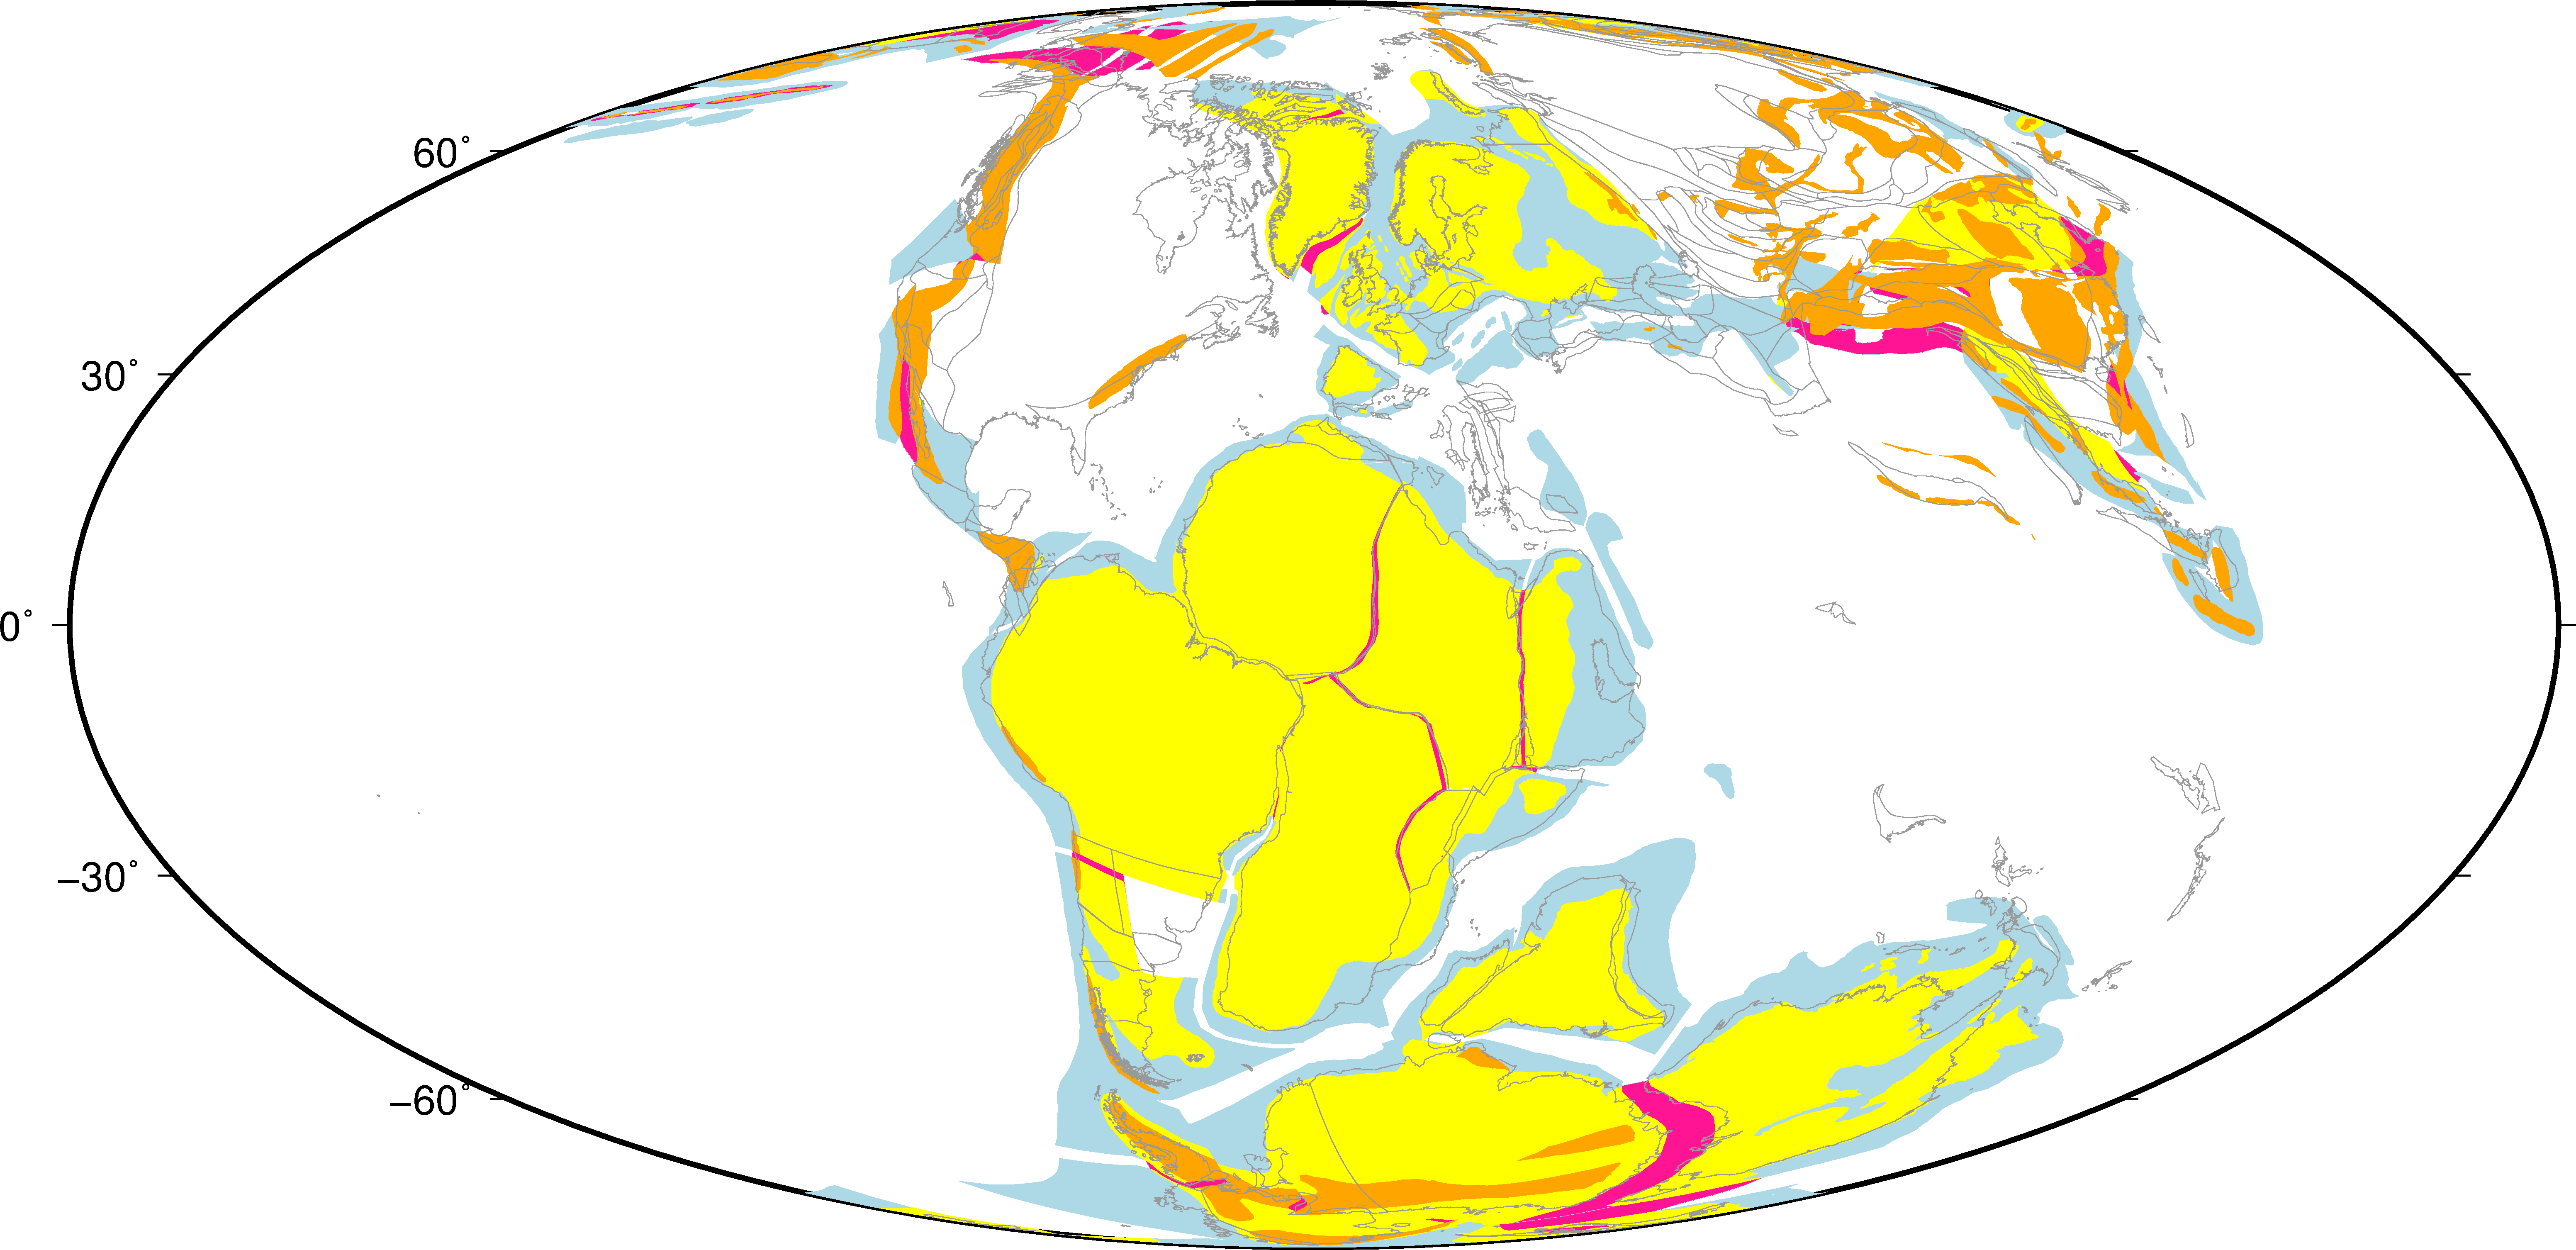

In [21]:
outfile = 'Paleogeog_Reconstructed_EBIDs_'+str(reconstruction_time)+'Ma_DisplayGaps.ps'

#basedir = '/Users/wenchaocao/Research/6_CookieCutting_Corrections/'+str(reconstruction_time)+'/TopologyMethod_'+str(reconstruction_time)+'Ma/8_Reconstructed_Paleogeog_EBIDs_'+str(reconstruction_time)+'Ma_Modified_Paleobiology'
basedir = '../Data/6_2_Reconstructed_Paleogeog_EBIDs_'+str(reconstruction_time)+'Ma_Matthews2016GPC'

#print basedir
icesheet =  '%s/i_fig%d_%d_%d_reconstructed_%0.2fMa_reconstructed_%0.2fMa_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time,reconstruction_time,reconstruction_time)
mountain =  '%s/m_fig%d_%d_%d_reconstructed_%0.2fMa_reconstructed_%0.2fMa_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time,reconstruction_time,reconstruction_time)
landmass = '%s/lm_fig%d_%d_%d_reconstructed_%0.2fMa_reconstructed_%0.2fMa_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time,reconstruction_time,reconstruction_time)
shallow_marine = '%s/sm_fig%d_%d_%d_reconstructed_%0.2fMa_reconstructed_%0.2fMa_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time,reconstruction_time,reconstruction_time)
all_features = '%s/AllFeatures_fig%d_%d_%d_reconstructed_%0.2fMa_reconstructed_%0.2fMa_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time,reconstruction_time,reconstruction_time)

print all_features
#icesheet =  '%s/i_fig%d_%d_%d.shp' % (basedir,FigNum,FromAge,ToAge)
#mountain =  '%s/m_fig%d_%d_%d.shp' % (basedir,FigNum,FromAge,ToAge)
#landmass = '%s/lm_fig%d_%d_%d.shp' % (basedir,FigNum,FromAge,ToAge)
#shallow_marine = '%s/sm_fig%d_%d_%d.shp' % (basedir,FigNum,FromAge,ToAge)

# Select a projection - central meridian is set to 30 deg longitude for each
#proj='-Ji30/0.02i'  # uncomment for Sinusoidal projection
#proj='-JN30/5i'      # uncomment for Robinson projection
proj='-JW0/10i'    # uncomment for Mollweide projection

os.system('gmt psbasemap -Rg %s -Ba30f30We -K > %s ' % (proj,outfile))

#rename files (shapefile -> shapefile; shapefile ->.gmt)
tmp = pygplates.FeatureCollection(all_features)
tmp.write('all_features.gmt')
tmp = pygplates.FeatureCollection(shallow_marine)
tmp.write('sm.gmt')
tmp = pygplates.FeatureCollection(landmass)
tmp.write('lm.gmt')
tmp = pygplates.FeatureCollection(mountain)
tmp.write('m.gmt')

if os.path.isfile(icesheet):
    tmp = pygplates.FeatureCollection(icesheet)
    tmp.write('i.gmt')
else:
        print 'No icesheet found' 

tmp = pygplates.FeatureCollection(output_reconstructed_feature_filename)
tmp.write('coastlines.gmt')

os.system('gmt psxy -Rg %s -W0.1p,lightblue -Gdeeppink all_features.gmt -K -O -N >> %s' % (proj,outfile))
os.system('gmt psxy -Rg %s -W0.1p,lightblue -Glightblue sm.gmt -K -O -N >> %s' % (proj,outfile))
os.system('gmt psxy -Rg %s -W0.1p,yellow -Gyellow lm.gmt -K -O -N >> %s' % (proj,outfile))
os.system('gmt psxy -Rg %s -W0.1p,orange -Gorange m.gmt -K -O -N >> %s' % (proj,outfile))
#os.system('gmt psxy -Rg %s -W0.1p,purple -Gpurple i.gmt -K -O -N >> %s' % (proj,outfile))
#os.system('gmt psxy -Rg %s -W0.5p,grey -O -K -m boundary_polygons_%0.2fMa.gmt -V >> %s' % (proj,reconstruction_time,outfile))

#plot coastlines
os.system('gmt psxy -Rg %s -W0.2p,grey60 -O -m coastlines.gmt -V >> %s' % (proj,outfile))

#plot subduction zones
#os.system('gmt psxy -Rg %s -W0.6p,darkgrey -Sf10p/2plt -K -O -m subduction_boundaries_sL_%0.2fMa.gmt -Ggrey -V >> %s' % (proj,reconstruction_time,outfile))
#os.system('gmt psxy -Rg %s -W0.6p,darkgrey -Sf10p/2prt -O -m subduction_boundaries_sR_%0.2fMa.gmt -Ggrey -V >> %s' % (proj,reconstruction_time,outfile))

#convert ps into raster, -E set the resolution
os.system('gmt ps2raster %s -A -E600 -Tg -P' % outfile)  #-F${reconstruction_time}Ma
os.system('gmt ps2raster %s -A -E600 -Tf -P' % outfile)  #-F${reconstruction_time}Ma

os.system('mv *.pdf *.png ../Code/Output/')
os.system('rm *.xml *.gmt *.xml *.shx *.shp *.history *.ps *.pyc *.shx *.prj *.dbf')

Image('../Code/Output/Paleogeog_Reconstructed_EBIDs_'+str(reconstruction_time)+'Ma_DisplayGaps.png')